## Tianyi Zhang 9598110243

------------------------

### 1. Combined Cycle Power Plant Data Set

#### 1.a

In [391]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [392]:
data  = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
print(data.head(5))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


#### 1.b

In [393]:
print('number of rows:'+str(len(data.index))+'\nnumber of columns:'+str(len(data.columns)))

number of rows:9568
number of columns:5


Each row is a data point.
Each column is one feature or the output of data. And 'AT','AP','RH','V' and 'PE' respectly means 'Ambient Temperature', 'Ambient Pressure', 'Relative Humidity', 'Exhaust Vacuum' and 'Electrical Energy Output'.

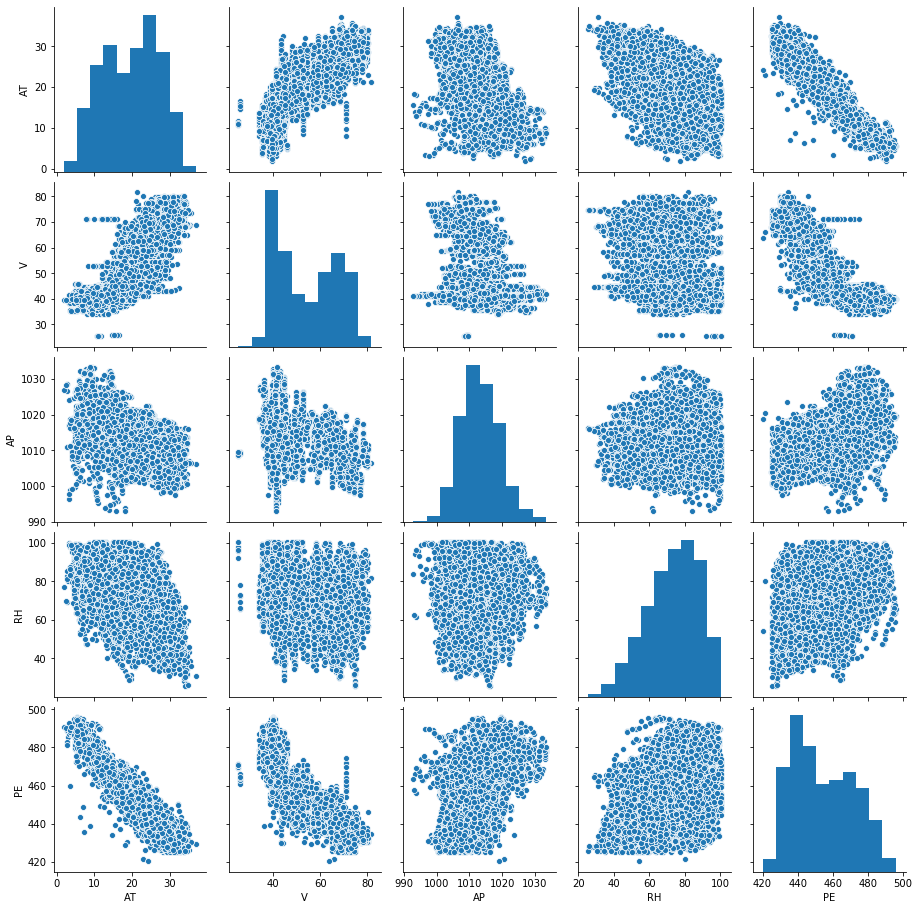

In [394]:
sns.pairplot(data=data, kind='scatter');

From the plots, we can find there are some linear relationship between the features and the output. 
In addition, the linear relationship with PE among all features: AT > V > AP > RH. It means that AT is the most linear related with the output. When the tempeture increases, the electrical energy output will decrease.

In [395]:

describe = pd.DataFrame({
    "mean": data.mean(),
    "median": data.median(),
    "range": zip(data.min(), data.max()),
    "first quartiles": data.quantile(.25),
    "third quartiles": data.quantile(.75),
    "interquartile range": data.quantile(.75) - data.quantile(.25)
})
print(describe.to_string())

           mean    median             range  first quartiles  third quartiles  interquartile range
AT    19.651231    20.345     (1.81, 37.11)          13.5100            25.72              12.2100
V     54.305804    52.080    (25.36, 81.56)          41.7400            66.54              24.8000
AP  1013.259078  1012.940  (992.89, 1033.3)        1009.1000          1017.26               8.1600
RH    73.308978    74.975   (25.56, 100.16)          63.3275            84.83              21.5025
PE   454.365009   451.550  (420.26, 495.76)         439.7500           468.43              28.6800


#### 1.c

In [396]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from sklearn.linear_model import LinearRegression

In [397]:
print(data.head(5))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:48   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

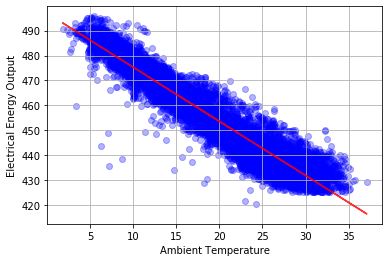

In [402]:
mod1 = smf.ols(formula='PE ~ AT', data=data).fit()
print(mod1.summary())
prediction = mod1.predict(data.iloc[:,0])

plt.scatter(data.iloc[:,0], data.iloc[:,-1], color='b', alpha=0.3)
plt.plot(data.iloc[:,0], prediction, color='r', alpha=0.8)
plt.grid(True)
plt.ylabel("Electrical Energy Output")
plt.xlabel("Ambient Temperature")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:48   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

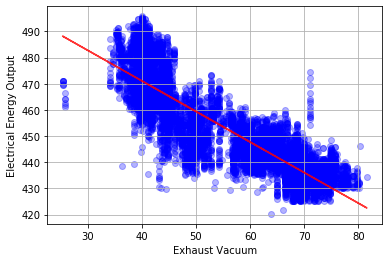

In [403]:
mod2 = smf.ols(formula='PE ~ V', data=data).fit()
print(mod2.summary())
prediction = mod2.predict(data.iloc[:,1])

plt.scatter(data.iloc[:,1], data.iloc[:,-1], color='b', alpha=0.3)
plt.plot(data.iloc[:,1], prediction, color='r', alpha=0.8)
plt.grid(True)
plt.ylabel("Electrical Energy Output")
plt.xlabel("Exhaust Vacuum")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:49   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

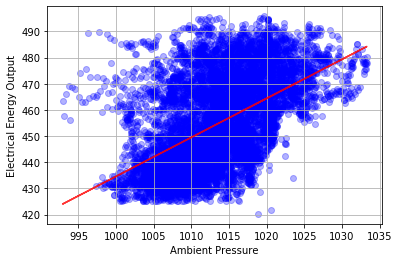

In [404]:
mod3 = smf.ols(formula='PE ~ AP', data=data).fit()
print(mod3.summary())
prediction = mod3.predict(data.iloc[:,2])

plt.scatter(data.iloc[:,2], data.iloc[:,-1], color='b', alpha=0.3)
plt.plot(data.iloc[:,2], prediction, color='r', alpha=0.8)
plt.grid(True)
plt.ylabel("Electrical Energy Output")
plt.xlabel("Ambient Pressure")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:49   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

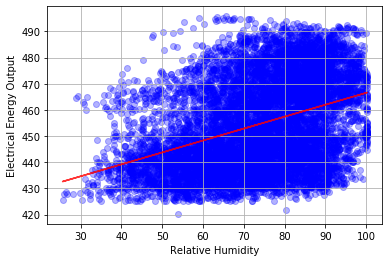

In [405]:
# dataset = data.iloc[:1000,:]
# print(dataset)
mod4 = smf.ols(formula='PE ~ RH', data=data).fit()
print(mod4.summary())
prediction = mod4.predict(data.iloc[:,3])

plt.scatter(data.iloc[:,3], data.iloc[:,-1], color='b', alpha=0.3)
plt.plot(data.iloc[:,3], prediction, color='r', alpha=0.8)
plt.grid(True)
plt.ylabel("Electrical Energy Output")
plt.xlabel("Relative Humidity")
plt.show()

**1. we can find that Ambient Temperature and Exhaust Vacuum are significantly related with the output, Electrical Energy.**

**2. yes, we can find some outliers in the plots. For example, in the Exhaust Vacuum plot, we can find some points are distributed away our line, and show as a vertical line.**

#### 1.d

In [406]:
mod = smf.ols(formula='PE ~ AT + V + AP + RH', data=data).fit()
print(mod.summary())
prediction = mod.predict(data.iloc[:,:-1])


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:50   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

**Because p-values for all predictors are less than 0.05, all predictors can reject the null hypothesis.**

#### 1.e

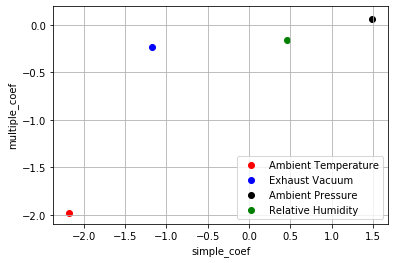

In [407]:
simple_coef = np.zeros(4)
multiple_coef = np.array(mod.params)[1:]
simple_coef[0] = np.array(mod1.params)[1]
simple_coef[1] = np.array(mod2.params)[1]
simple_coef[2] = np.array(mod3.params)[1]
simple_coef[3] = np.array(mod4.params)[1]

labels = ['Ambient Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
colors = ['r', 'b', 'k', 'g']

for index in range(4):
    plt.scatter(simple_coef[index], multiple_coef[index], label = labels[index], color = colors[index] )

plt.xlabel('simple_coef')
plt.ylabel('multiple_coef')
plt.legend()
plt.grid()
plt.show()


**from 1c, maybe we will conclude that Ambient Pressure and Relative Humidity are not significantly related with the output from the 4 plots, but from the result of the p-values of 1d, which all are very low, we know that actullay, maybe we cannot think they are not linear related just based on the plots.**

#### 1.f

In [408]:
from sklearn.preprocessing import PolynomialFeatures

In [409]:
mod1 = smf.ols(formula='PE ~ AT + np.square(AT) + np.power(AT, 3)', data=data)
mod1 = mod1.fit()
print(mod1.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:50   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         492.7281      0.673    7

In [410]:
mod2 = smf.ols(formula='PE ~ V + np.square(V) + np.power(V, 3)', data=data)
mod2 = mod2.fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:50   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        554.1468      9.151     60.

In [411]:
mod3 = smf.ols(formula='PE ~ AP + np.square(AP) + np.power(AP, 3)', data=data)
mod3 = mod3.fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:50   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0747      0.009     

In [412]:
mod4 = smf.ols(formula='PE ~ RH + np.square(RH) + np.power(RH, 3)', data=data)
mod4 = mod4.fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:50   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         468.4135     10.545     

**From the p-values, we can find that only the p-value for the square term of Exhaust Vacuum is very high. For other terms, we can conclude that there is evidence of nonlinear association between the predictor and the output.**

#### 1.g

In [413]:
mod1 = smf.ols(formula='PE ~ AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH', data=data)
mod1 = mod1.fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:50   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

**We can find that the p-values for AT\*AP, V\*RH are more than 0.05, so they are not significant.**

**So, we can know, Ambient Temperature\*Exhaust Vacuum, Ambient Temperature\*Relative Humidity, Exhaust Vacuum\*Ambient Pressure and Ambient Pressure\*Relative Humidity terms are statistically significant.**

#### 1.h

In [414]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [415]:
data = data.sample(frac=1).reset_index(drop=True)
print(data.head(5))

datatr, datate = train_test_split(data, test_size=0.3)
print(datatr.shape, datate.shape)

      AT      V       AP     RH      PE
0  11.72  39.18  1024.19  68.53  468.98
1  14.11  45.08  1023.27  83.22  464.70
2  14.79  38.73   999.83  86.45  470.28
3   4.31  38.50  1011.75  82.08  492.92
4  18.85  67.32  1012.91  82.37  446.70
(6697, 5) (2871, 5)


In [416]:
mod1 = smf.ols(formula='PE ~ AT+V+AP+RH', data=datatr)
mod1 = mod1.fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.172e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:51   Log-Likelihood:                -19653.
No. Observations:                6697   AIC:                         3.932e+04
Df Residuals:                    6692   BIC:                         3.935e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    457.2222     11.556     39.565      0.0

In [417]:
mod2 = smf.ols(formula='PE ~ AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH + np.square(AT)+np.square(V)+np.square(AP)+np.square(RH)', data=datatr)
mod2 = mod2.fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7169.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:51   Log-Likelihood:                -19197.
No. Observations:                6697   AIC:                         3.842e+04
Df Residuals:                    6682   BIC:                         3.853e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8445.3038   1424.327     -5.929

In [418]:
remaining_var = set([key for key, p_value in mod2.pvalues.items() if p_value <= 0.05])
print(remaining_var)

{'AT:RH', 'AP:RH', 'np.square(AT)', 'RH', 'AP', 'np.square(RH)', 'Intercept', 'AT:V', 'V', 'np.square(AP)'}


In [419]:
mod3 = smf.ols(formula='PE ~ AT*V+AT*RH+V*AP+AP*RH + np.square(AT)+np.square(AP)+np.square(RH)-AT', data=datatr)
mod3 = mod3.fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     9294.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:24:51   Log-Likelihood:                -19440.
No. Observations:                6697   AIC:                         3.890e+04
Df Residuals:                    6686   BIC:                         3.898e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.149e+04   1303.033     -8.821

In [420]:
print('----------------------------------------------------------')
ytr = mod1.predict(datatr.iloc[:,:-1])
print('training MSE of original model:' + str(mean_squared_error(ytr, datatr.iloc[:,-1])))
yte = mod1.predict(datate.iloc[:,:-1])
print('test MSE of original model:' + str(mean_squared_error(yte, datate.iloc[:,-1])))
print('----------------------------------------------------------')
ytr = mod3.predict(datatr.iloc[:,:-1])
print('training MSE of improved model:' + str(mean_squared_error(ytr, datatr.iloc[:,-1])))
yte = mod3.predict(datate.iloc[:,:-1])
print('test MSE of improved model:' + str(mean_squared_error(yte, datate.iloc[:,-1])))

----------------------------------------------------------
training MSE of original model:20.724143903674584
test MSE of original model:20.88031410110559
----------------------------------------------------------
training MSE of improved model:19.445072213626467
test MSE of improved model:19.742261548691328


**we can find the MSE has decreased, so we have improved the model using possible interaction terms or nonlinear asso-
ciations between the predictors and response**

#### 1.i

In [421]:
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor

In [422]:
data = data.sample(frac=1).reset_index(drop=True)
print(data.head(5))

datatr, datate = train_test_split(data, test_size=0.3)
print(datatr.shape, datate.shape)



      AT      V       AP     RH      PE
0  25.14  69.13  1011.15  85.67  433.95
1  27.13  69.45  1013.90  51.16  434.47
2  17.01  50.59  1015.80  80.95  463.40
3  21.47  57.19  1006.45  75.80  448.31
4  26.02  59.57  1011.16  76.93  446.50
(6697, 5) (2871, 5)


In [423]:
transformer = Normalizer().fit(data.iloc[:,:-1])
X_normal = transformer.transform(data.iloc[:,:-1])
y = data.iloc[:,-1]
ytr, yte = train_test_split(y, test_size=0.3, shuffle = False)
print(ytr.shape, yte.shape)
xtr_normal = X_normal[:6697,:]
xte_normal = X_normal[6697:,:]
print(xtr_normal.shape, xte_normal.shape)

(6697,) (2871,)
(6697, 4) (2871, 4)


In [424]:
k = np.arange(1, 101, 1)
# print(k)

err_tr = np.arange(100, dtype = np.float)
err_te = np.arange(100, dtype = np.float)

err_tr_normal = np.arange(100, dtype = np.float)
err_te_normal = np.arange(100, dtype = np.float)
j = 0
# print(err_te)

for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(datatr.iloc[:,:-1], datatr['PE'])
    knn2 = KNeighborsRegressor(n_neighbors=i).fit(xtr_normal, ytr)
    
    err_tr[j] = mean_squared_error(knn.predict(datatr.iloc[:,:-1]),datatr.iloc[:,4])
    err_te[j] = mean_squared_error(knn.predict(datate.iloc[:,:-1]),datate.iloc[:,4])
    err_tr_normal[j] = mean_squared_error(knn2.predict(xtr_normal),ytr)
    err_te_normal[j] = mean_squared_error(knn2.predict(xte_normal),yte)
    
    j = j+1
errMin = np.min(err_te)
index = np.argmin(err_te)
K_best = k[index]
print('best error(raw):', errMin)
print('best K(raw):', K_best)

errMin_tr = np.min(err_tr)
print('best training error(raw):', errMin_tr)

errMin = np.min(err_te_normal)
index = np.argmin(err_te_normal)
K_best = k[index]
print('best error(Normalized):', errMin)
print('best K(Normalized):', K_best)

errMin_tr = np.min(err_tr_normal)
print('best training error(Normalized):', errMin_tr)

best error(raw): 14.836027063740861
best K(raw): 5
best training error(raw): 0.0
best error(Normalized): 18.03454395724486
best K(Normalized): 20
best training error(Normalized): 0.0


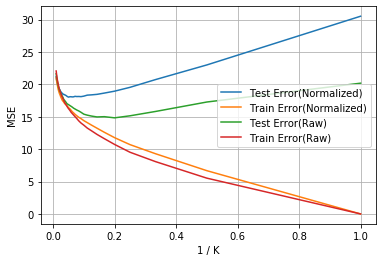

In [425]:
plt.plot(1 / k, err_te_normal, label='Test Error(Normalized)')
plt.plot(1 / k, err_tr_normal, label='Train Error(Normalized)')
plt.plot(1 / k, err_te, label='Test Error(Raw)')
plt.plot(1 / k, err_tr, label='Train Error(Raw)')

plt.legend()
plt.grid()
plt.xlabel('1 / K')
plt.ylabel('MSE')
plt.show()

#### 1.j

**because the smallest MSE with linear regression model we got is 18.909546649302765. But the smallest MSE with KNN regression we got is 16.180040418190526. So we can conclude that KNN regression model is better than Linear Regression model on this problem.**

### 2.(ISLR: 2.4.1)

1. For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors
p is small.

(b) The number of predictors p is extremely large, and the number
of observations n is small.

(c) The relationship between the predictors and response is highly
non-linear.

(d) The variance of the error terms, i.e. σ2 = Var(), is extremely
high.

**a).When The sample size n is extremely large, we will get a high degree of freedom, which means we should use a method with high flexibility. So it's better to choose a flexible method.**

**b).in this case, inflexible method will be enough and better. because if we use a flexible method, we may overfit the data, then the model can't generalize very well**

**c).the relationship is non-linear, it's better to use a flexible model. inflexible model will be not enough.**

**d).The flexible model usually has a lower bias but higher variance. Since the variance is already very high, so it's better to use an inflexible model.**


### 3.(ISLR: 2.4.7)

a).assuming the test point is Z
$$distance_{1,Z} = {\sqrt{0 + 3^2 + 0}} = {\sqrt{10}}$$<br>
$$distance_{2,Z} = {\sqrt{2^2 + 0 + 0}} = {\sqrt{4} = 2}$$<br>
$$distance_{3,Z} = {\sqrt{0 + 1^2 + 3^2}} = {\sqrt{10}}$$<br>
$$distance_{4,Z} = {\sqrt{0 + 1^2 + 2^2}} = {\sqrt{5}}$$<br>
$$distance_{5,Z} = {\sqrt{(-1)^2 + 0 + 1^2}} = {\sqrt{2}}$$<br>
$$distance_{6,Z} = {\sqrt{1^2 + 1^2 + 1^2}} = {\sqrt{3}}$$

**b).From the distances we compute, the 5th distance is the lowest. And the 5th is green. so the prediction is green.**

**c).From the distances we compute, the first three lowest distance are 5th, 6th, and 2nd. And, there are 2 red and 1 green among them. So the prediction is red.**

**d).It said the Bayes decision boundary is non-linear, so the model is very flexible.**

**And we know when k increases, the model's flexibility will decrease.**

**In short, we should expect the best value for K to be small when the Bayes decision boundary is non-linear**